In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score , recall_score , precision_recall_curve , fbeta_score , precision_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.Risk.value_counts(normalize=True)

Risk
1    0.608677
0    0.391323
Name: proportion, dtype: float64

In [4]:
X = df.drop(columns=['Risk', 'Stress_Level', 'Depression_Score', 'Anxiety_Score'])
y = df['Risk']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]

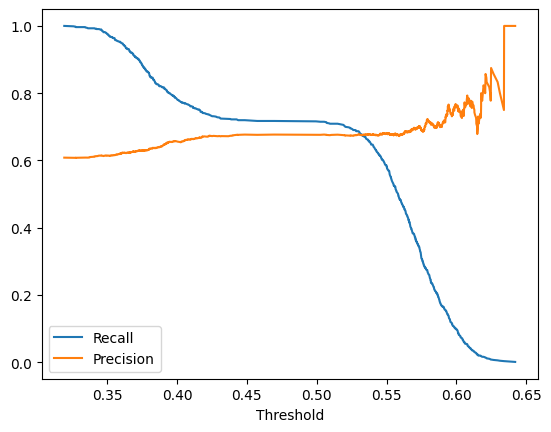

In [7]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()

Intersection at threshold = 0.5325
Precision = Recall = 0.6753


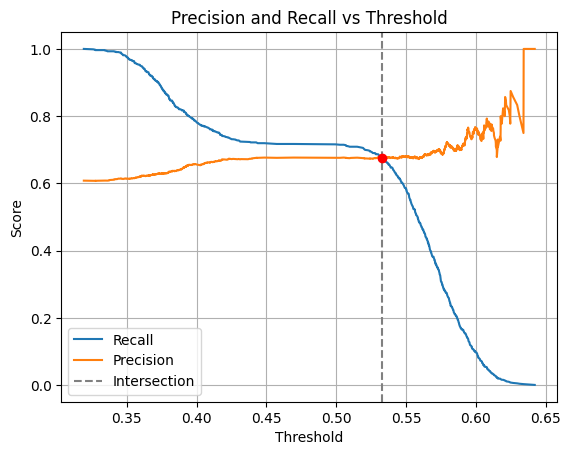

In [8]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
precisions = precisions[:-1]
recalls = recalls[:-1]
diff = np.abs(precisions - recalls)
intersection_idx = np.argmin(diff)
intersection_threshold = thresholds[intersection_idx]
intersection_precision = precisions[intersection_idx]
intersection_recall = recalls[intersection_idx]
print(f"Intersection at threshold = {intersection_threshold:.4f}")
print(f"Precision = Recall = {intersection_precision:.4f}")
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.axvline(intersection_threshold, color='gray', linestyle='--', label='Intersection')
plt.scatter(intersection_threshold, intersection_precision, color='red', zorder=5)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs Threshold')
plt.grid(True)
plt.show()

In [9]:
thresholds = [0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45]
results = []
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    results.append({
        'Threshold': threshold,
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'FBeta_score': fbeta_score(y_test, y_pred , beta=2),
        'Accuracy': (y_pred == y_test).mean()
    })

results_df = pd.DataFrame(results)
print(results_df.round(3))

optimal_threshold = 0.36

y_pred_final = (y_probs >= optimal_threshold).astype(int)
print(f"\n{'='*50}")
print(f"Final Model Performance (Threshold = {optimal_threshold})")
print(f"{'='*50}")
print(classification_report(y_test, y_pred_final))
print(f"ROC AUC: {roc_auc_score(y_test, y_probs):.3f}")

    Threshold  Recall  Precision  FBeta_score  Accuracy
0        0.35   0.975      0.614        0.873     0.612
1        0.36   0.950      0.621        0.859     0.617
2        0.37   0.909      0.627        0.834     0.616
3        0.38   0.858      0.634        0.802     0.613
4        0.39   0.817      0.645        0.776     0.616
5        0.40   0.781      0.656        0.752     0.618
6        0.41   0.761      0.663        0.739     0.619
7        0.42   0.740      0.671        0.725     0.621
8        0.43   0.728      0.673        0.716     0.619
9        0.44   0.722      0.675        0.712     0.620
10       0.45   0.719      0.677        0.710     0.620

Final Model Performance (Threshold = 0.36)
              precision    recall  f1-score   support

           0       0.56      0.10      0.17       549
           1       0.62      0.95      0.75       853

    accuracy                           0.62      1402
   macro avg       0.59      0.52      0.46      1402
weighted avg